In [1]:
import pandas as pd
import numpy as np
## input data
Q=np.array([80,150,135,165,95,130,110])
L=np.array([60,100,100,120,70,90,80])
K=np.array([50,100,80,100,60,80,70])
a=[Q,L,K];     y=[]
for i in range(len(a[0])):
    n = []
    for j in range(len(a)):
        n.append(a[j][i])
    y.append(n)
feature_names=np.array(['Output_Q','Labour_L','Capital_K'])
df = pd.DataFrame(data=y, columns=feature_names);    print(df)

   Output_Q  Labour_L  Capital_K
0        80        60         50
1       150       100        100
2       135       100         80
3       165       120        100
4        95        70         60
5       130        90         80
6       110        80         70


In [2]:
###Question2_a
##mean and variance
mean_df=df.mean();     var_df=df.var()
##standard deviation and median values
std_df=df.std();           mv_df=df.median()
## transform
mean_df=np.array(mean_df);    var_df=np.array(var_df)
std_df=np.array(std_df);          mv_df=np.array(mv_df)
##putinto one array
Q2_a=[mean_df, var_df, std_df, mv_df]
index_names=np.array(['mean','variance','standard deviation','median values'])
## dataframe
Q2_a = pd.DataFrame(data=Q2_a, columns=feature_names,index=index_names)
## print answer
print(Q2_a)

                      Output_Q    Labour_L   Capital_K
mean                123.571429   88.571429   77.142857
variance            914.285714  414.285714  357.142857
standard deviation   30.237158   20.354010   18.898224
median values       130.000000   90.000000   80.000000


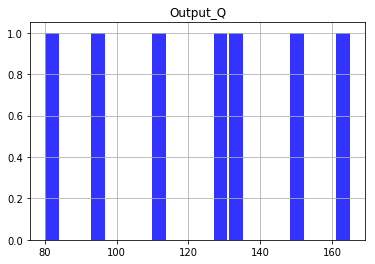

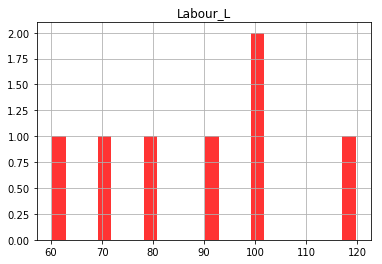

In [14]:
###Question2_b
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure();   x = df['Output_Q']
ax = fig.add_subplot(111);  numBins = 20
ax.hist(x,numBins,color='blue',alpha=0.8,rwidth=0.9)
plt.grid(True);   plt.title(u'Output_Q');  plt.show()
fig = plt.figure();   x = df['Labour_L']
ax = fig.add_subplot(111);  numBins = 20
ax.hist(x,numBins,color='red',alpha=0.8,rwidth=0.9)
plt.grid(True);   plt.title(u'Labour_L');  plt.show()

In [4]:
###Question2_c
log_y=np.log(y)
print('log value:\n',log_y)

log value:
 [[4.38202663 4.09434456 3.91202301]
 [5.01063529 4.60517019 4.60517019]
 [4.90527478 4.60517019 4.38202663]
 [5.10594547 4.78749174 4.60517019]
 [4.55387689 4.24849524 4.09434456]
 [4.86753445 4.49980967 4.38202663]
 [4.70048037 4.38202663 4.24849524]]


In [8]:
###Question2_d
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
x= log_y[0:,1:]
y = log_y[0:,0]
lr = linear_model.LinearRegression()
lr.fit(x, y)
alpha_beta=sum(lr.coef_)

print("coefficients alpha and beta:")
print(lr.coef_)
print("intercept logA is:")
print(lr.intercept_)
print("the sum of alpha and beta value is:\n",alpha_beta)

coefficients alpha and beta:
[0.54842747 0.50874094]
intercept logA is:
0.14623321175616866
the sum of alpha and beta value is:
 1.0571684057723618


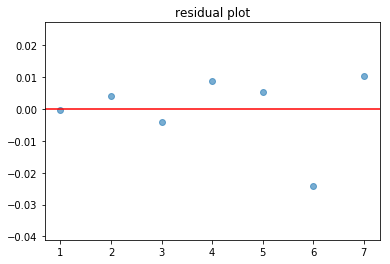

In [9]:
###Question2_e
pre_y=lr.predict(x)
residuals=pre_y-y;   fig, ax = plt.subplots()
index=[1,2,3,4,5,6,7]
ax.scatter(index,residuals, alpha=0.6)
plt.title('residual plot');    plt.axhline(y=0,color='red')

In [13]:
###Question2_f
RR=lr.score(x, y)   
n=len(x); p=x.shape[1]
Adjust_RR=1-(1-RR)*(n-1)/(n-p-1)
print('the number of samples is:',n)
print('the nemuber of predicted variables is:',p)
print('Adjusted R square is:', Adjust_RR)

the number of samples is: 7
the nemuber of predicted variables is: 2
Adjusted R square is: 0.9968763418198051
